<a href="https://colab.research.google.com/github/keisuke6616/PCA-consistency-for-the-power-spiked-model-in-high-dimensional-settings/blob/master/Figure3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I examine performance of the cross-data-matrix methodology.

\\

Setting : \\
${\bf X} = [{\bf x_1}, \ldots, {\bf x_n}]$ : $d \times n$ data matrix with $d > n$, where ${\bf x_k} = (x_{1k}, \ldots, x_{dk})^{\mathrm T}, k = 1, \ldots, n \, iid \, E[{\bf x_k}] = {\bf 0}, Var[{\bf x_k}] = {\bf \Sigma}$ \\
The eigen-decomposition of ${\bf \Sigma}$ is ${\bf \Sigma} = {\bf H \Lambda H^{\mathrm T}}$, where ${\bf \Lambda}$ is a diagonal matrix of eigenvalues $\lambda_1\geq \ldots \geq \lambda_d (>0)$ and ${\bf H} = [{\bf h_1}, \ldots, {\bf h_d}]$ is a matrix of corresponding eigenvectors. \\
${\bf Z} = {\bf \Lambda^{1/2} H X}$ is a $d \times n$ sphered data matrix from a distribution with the identity covariance matrix.
I can write ${\bf Z} = [{\bf z_1}, \ldots, {\bf z_d}]^{\mathrm T}$ and ${\bf z_j} = (z_{j1}, \ldots, z_{jn}), j = 1, \ldots, d$ \\

${\bf S} = n^{-1} {\bf XX^{\mathrm T}}$ : The sample covariance matrix \\
${\bf S}_D = n^{-1} {\bf X^{\mathrm T} X}$ : The dual matrix \\

\\

Model : \\
${\lambda_j} = a_j d^{\alpha_j} \, (j = 1, \ldots, m)$ and ${\lambda_j} = c_j \, (j = m+1, \ldots, d)$ \\
where ${a_j}(>0)$, ${c_j}(>0)$ and ${\alpha_j}(>0)$ are unknown constants, and  $m$ is unknown positive integer. \\

\\

The noise-reductiono methodology : \\
${\tilde \lambda_j} = {\hat \lambda_j} - \frac{{\mathrm tr}({\bf S}_D) - \sum_{i = 1}^j {\hat \lambda_i}}{n - j} \, (j = 1, \ldots, n-1)$

\\

The cross-data-methodology : \\
${\bf X}_i = [{\bf x_{i1}}, \ldots, {\bf x_{in}}]$ : $d \times n$ data matrix, $i = 1, 2$ \\
Yata and Aoshima define a cross data matrix by ${\bf S}_{D(1)} = (n_1 n _2)^{-1} {\bf X_1 X_2}$, where ${n_1 = O(n), n_2 = O(n)}$ \\
Then you can calculate the singular values ${\tilde \lambda}_j$'s of ${\bf S}_{D(1)}$ for the estimation of $\lambda_j$'s \\

\\

Simulation : \\

At first, Yata and Aoshima considered the Caussian case.
Independent pseudorandom normal observations were generated from $N_d({\bf 0}, {\bf \Sigma})$. They considered thet ${\bf \Sigma}_{(1)} = {\mathrm {diag}} (\lambda_1, \lambda_2, \lambda_3, 0, \ldots, 0)$ and 
${\bf \Sigma}_{(2)} = \left( \begin{array}{ccc} {\bf 0}_{3, 3} & {\bf 0}_{3, \mathrm d - 3}\\ {\bf 0}_{\mathrm d - 3, 3} & {\bf \Sigma}_{\ast} \end{array} \right)$, where $\lambda_1 = d^{4/5}$, $\lambda_2 = d^{3/5}$, $\lambda_3 = d^{2/5}$, ${\bf \Sigma}_{\ast} = (\sigma_{ij})$ with $\sigma_{ij} = (|i - j| + 1) ^{-1}$ and ${\bf 0}_{k, l}$ is the $k \times l$ zero matrix. They considered the cases of $d$ = 400(200)1200 and $n$ = 40.They compered with ${\hat \lambda}$, ${\acute \lambda}$ and ${\tilde \lambda}$, where ${\hat \lambda}$, ${\acute \lambda}$, and ${\tilde \lambda}$ are the estimation of $\lambda$ by using dual matrix, the cross-data-methodology and noise-reduction methodology respectively.


In [0]:
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt

import time

# Figure3

In [0]:
t1 = time.time()
np.random.seed(42)

N = 40
D = [400 + 200 * i for i in range(5)]
index = [i for i in range(len(D))]

fnc = function()
iter = 1000

result = np.zeros((len(D), 3, 3, iter))
result_mean = np.zeros((len(D), 3, 3))
result_var = np.zeros((len(D), 3, 3))
khat = 0


for d, pc in zip(D, index):
    print('Dimension : {}'.format(d))
    
    Sigma_1 = [d**(4/5), d**(3/5), d**(2/5)] + [0 for i in range(d - 3)]
    Sigma_2 = np.zeros((d, d))
    for i in range(3, d):
        for j in range(3, d):
            Sigma_2[i, j] = 1 / (np.abs(i - j) + 1)
    Sigma = np.diag(Sigma_1) + Sigma_2
            
    value, vec = fnc.eig_sort(Sigma)
    Gamma = np.sqrt(value).reshape(-1, d) * vec
    
    for l in range(iter):
        Z = np.random.normal(0, 1, (N, d))
        X = np.dot(Z, Gamma.T)
        
        fnc.data(X, bias=True)
        
        result[pc, 0, :, l] = fnc.dual_value()[:3]
        result[pc, 1, :, l] = fnc.NRM_value()[:3]
        result[pc, 2, :, l] = fnc.CDM_value()[:3]
    
    for i in range(3):
        for j in range(3):
            result_mean[pc, i, j] = np.mean(result[pc, i, j])
            result_var[pc, i, j] = np.var(result[pc, i, j], ddof=1)
        
    print('Mean')
    print('dual :{} '.format(result_mean[pc, 0]))
    print('CDM : {}'.format(result_mean[pc, 1]))
    print('NRM : {}'.format(result_mean[pc, 2]))
    print('True : {}'.format(Sigma_1[:3]))
    print('Var')
    print('dual :{} '.format(result_var[pc, 0]))
    print('CDM : {}'.format(result_var[pc, 1]))
    print('NRM : {}'.format(result_var[pc, 2]))
    print('')
    
        
        


Dimension : 400
Mean
dual :[132.97120632  46.26075914  24.25643853] 
CDM : [121.87664067  36.09161963  14.46803684]
NRM : [119.1984854   35.08625369  14.89499139]
True : [120.6835267309033, 36.4112840605216, 10.98560543306118]
Var
dual :[744.63717459  56.56879044   3.49470931] 
CDM : [744.55736988  56.60263245   3.40246113]
NRM : [728.92314487  54.91807081   3.01785373]

Dimension : 600
Mean
dual :[185.83341272  61.37240154  31.71635409] 
CDM : [169.42896076  46.15131666  16.94108731]
NRM : [165.58698734  44.73233781  17.72136761]
True : [166.92485217612375, 46.43984379003458, 12.919940099556335]
Var
dual :[1369.5297446   104.13872212    4.6002556 ] 
CDM : [1368.97120937  104.0578021     4.43789121]
NRM : [1339.09372142   94.95650975    3.86594884]

Dimension : 800
Mean
dual :[229.29878755  74.59529992  38.74699994] 
CDM : [207.64569466  54.335423    18.98677499]
NRM : [203.21322113  52.65678801  20.05536451]
True : [210.12222435230143, 55.18918645844858, 14.495593273553913]
Var
dual :

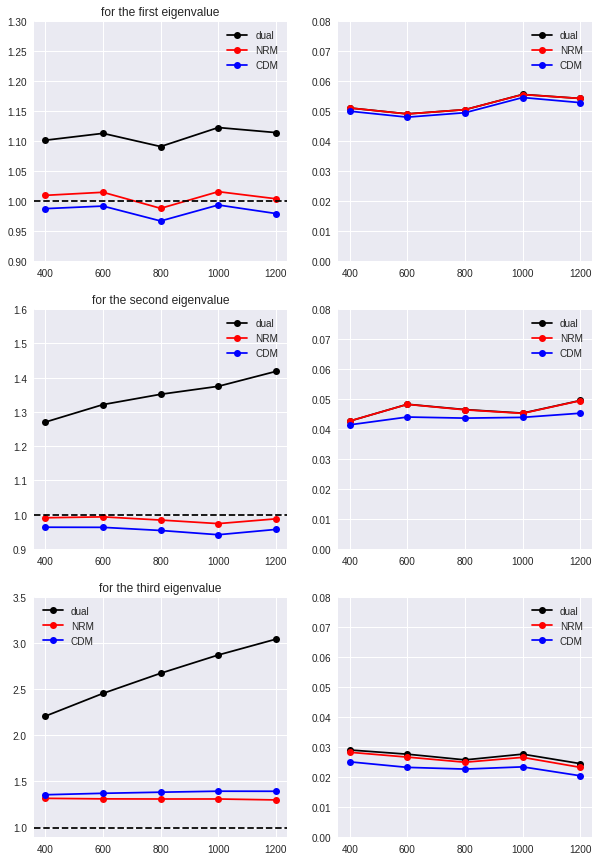

In [0]:
plt.figure(figsize=(10, 15))

color_list = ['black', 'red', 'blue']
label_list = ['dual', 'NRM', 'CDM']

mean = np.zeros((len(D), 3, 3))
var = np.zeros((len(D), 3, 3))
for d, pc in zip(D, index):
    eig = [d**(4/5), d**(3/5), d**(2/5)]
    for i in range(3):
        mean[pc, :, i] = result_mean[pc, :, i] / eig[i]
        var[pc, :, i] = result_var[pc, :, i] / eig[i]**2
    
        
plt.subplot(3, 2, 1)
for i in range(3):
    plt.plot(D, mean[:, i, 0], 'o-', color=color_list[i], label=label_list[i])
plt.axhline(y=1, color='black', linestyle='dashed')
plt.ylim(0.9, 1.3)
plt.title('for the first eigenvalue')
plt.legend()
    
plt.subplot(3, 2, 2)
for i in range(3):
    plt.plot(D, var[:, i, 0], 'o-', color=color_list[i], label=label_list[i])
plt.ylim(0, 0.08)
plt.legend()
    

plt.subplot(3, 2, 3)
for i in range(3):
    plt.plot(D, mean[:, i, 1], 'o-', color=color_list[i], label=label_list[i])
plt.axhline(y=1, color='black', linestyle='dashed')
plt.ylim(0.9, 1.6)
plt.title('for the second eigenvalue')
plt.legend()    


plt.subplot(3, 2, 4)
for i in range(3):
    plt.plot(D, var[:, i, 1], 'o-', color=color_list[i], label=label_list[i])
plt.ylim(0, 0.08)
plt.legend()



plt.subplot(3, 2, 5)
for i in range(3):
    plt.plot(D, mean[:, i, 2], 'o-', color=color_list[i], label=label_list[i])
plt.axhline(y=1, color='black', linestyle='dashed')
plt.ylim(0.9, 3.5)
plt.title('for the third eigenvalue')
plt.legend()    


plt.subplot(3, 2, 6)
for i in range(3):
    plt.plot(D, var[:, i, 2], 'o-', color=color_list[i], label=label_list[i])
plt.ylim(0, 0.08)
plt.legend()

plt.show()

# Function

In [0]:
import numpy as np
import numpy.linalg as la


class function:
        
        
################################ prepare ########################################################
    
            
    def eig_sort(self, S):
        value, vec = la.eig(S)
        idx = value.argsort()[::-1]
        P = value[idx]
        Q = vec.T[idx]

        return (P, Q.T)
    
    
    
    def  svd_sort(self, S):
        vec_r, value, vec_l = la.svd(S)
        idx = value.argsort()[::-1]
        P = value[idx]
        Q_r = vec_r.T[idx]
        Q_l = vec_l.T[idx]
        
        return (Q_r.T, P, Q_l.T)
 


    def data(self, X, bias=False):
        self.bias = bias
        self.N, self.D = X.shape
        self.X = X
        if bias == False:
            self.mean = np.array([np.mean(self.X, axis=0)]*N)
            self.S = np.dot(self.X - self.mean, (self.X - self.mean).T) / (self.N - 1)
            self.value, self.vec = self.eig_sort(self.S)
        
        elif bias == True:
            self.S = np.dot(self.X, self.X.T) / self.N
            self.value, self.vec = self.eig_sort(self.S)
    
    
    
    def sign_ad(self, Z): 
        X = Z.T[:self.N+1]
        Y = self.vec.T[:self.N+1]
        for i in range(self.N):
            sign = np.dot(X[i], Y[i])
            if sign < 0:
                Y[i] = - Y[i]

        return Y.T
    
    
    
    def P(self):
        one = np.array([1 for i in range(self.N)])
        mat = np.eye(self.N) - np.einsum('i, j -> ij', one, one) / self.N
        return mat
    
    
    
###################### check SSE Model ###############################
   
    def check_sse(self):
        value = self.CDM_value()
        SDcross = self.SDcross
        phi, tau = [0]*self.n2, [0]*self.n2
        
        def kappa(n):
            return np.sqrt((n**(-1) * np.log(n)))
    
        for j in range(self.n2):
            phi[j] = np.trace(np.dot(SDcross, SDcross.T)) - np.sum(value[i]**2 for i in range(j))
        
        for j in range(self.n2 - 1):
            tau[j] = phi[j + 1] / phi[j]
            if tau[j] * (1 + (j + 1) * kappa(self.N)) > 1:
                mhat = j - 1
                break
                
        mhat = np.min([mhat, self.n2 - 3])
        
        return mhat
    
    
    
######################## estimation of eigen vector ########################
    
    def et_vec(self, value, M):
        
        vec = np.zeros((self.D, M))    
        value = value[:M+1]
        
        if self.bias == False:
            for m in range(M):
                vec.T[m] = np.dot(self.vec.T[m], self.X - self.mean) / np.sqrt((self.N - 1) * value[m])
                
        if self.bias == True:
            for m in range(M):
                vec.T[m] = np.dot(self.vec.T[m], self.X) / np.sqrt(self.N * value[m])
                
        return vec         
    
    
    
    
################################ projection matrix #########################################

    def prj(self, vec, M):
        prj = np.eye(self.D) - np.sum(np.einsum('i, j -> ij', vec.T[i], vec.T[i]) for i in range(M))
        return prj


    
######################################### dual covariance matrix #######################################
    def dual(self):
        return (self.value, self.vec)
    
    def dual_value(self):
        return self.value
    
    
    
########################################### noise-reduction ##############################################
    
    def NRM_value(self): 
        value = np.zeros(self.N)
        
        if self.bias == False:
            for j in range(self.N - 2):
                value[j] = self.value[j] - (np.trace(self.S) - np.sum(self.value[0 :(j+1)])) / (self.N - j - 2)
        
        elif self.bias == True:
            P = self.eig_sort(self.S)[0]
            for j in range(self.N - 1):
                value[j] = self.value[j] - (np.trace(self.S) - np.sum(self.value[0 :(j+1)])) / (self.N - j - 1)
            
        return value
    
    
    
    def NRM(self): 
        M = self.check_sse()
        value = self.NRM_value()
        
        spiked_vec = et_vec(velue, M)
        prj = self.prj(spiked_vec, M)
        
        return (value, spiked_vec, prj, M)
    
    
   
               
        
####################################### cross-data-methodology #############################################
        
    
    def CDM_value(self):
        value = np.zeros(self.N)

        n1 = int(np.ceil(self.N / 2))
        n2 = self.N - n1
        self.n2 = n2
        X1, X2 = self.X[:n1], self.X[-n2:]
        
        if self.bias == False:    
            mean1 = np.array([np.mean(X1, axis=0)] * n1)
            mean2 = np.array([np.mean(X2, axis=0)] * n2)
            
            self.SDcross = np.dot(X1 - mean1, (X2 - mean2).T) / np.sqrt((n1 - 1) * (n2 - 1))
            value = self.svd_sort(self.SDcross)[1]
            
        if self.bias == True:
            self.SDcross = np.dot(X2, X1.T) / np.sqrt(n1 * n2)
            value = self.svd_sort(self.SDcross)[1]
            
        return value
    
    
    
    
    def CDM(self):
        M = self.check_sse()
        value = self.CDM_value()
        
        spiked_vec = et_vec(value, M)
        prj = self.prj(spiked_vec, M)
        
        return (value, spiked_vec, prj, M)
    
    
    
    

        



############################### estiomation of tr(Sigma^2) #################################
    
    
    
    def ECDM(self, X):
        n = []
        n.append(int(np.ceil(self.N / 2)))
        n.append(self.N - n[0])

        K = [i for i in range(3, 2*self.N)]
        index =  [i for i in range(len(K))]


        V = [[], []]
        Y = np.zeros((2, len(K), self.D))
        for k, pc in zip(K, index):
            dv = int(np.floor(k / 2))

            if dv < n[0]:
                V[0].append([i for i in range(dv)] + [i for i in range(dv + n[1], self.N)])  
            else:
                V[0].append([i for i in range(dv - n[0], dv)])

            if dv <= n[0]:
                V[1].append([i for i in range(dv, dv + n[1])])
            else:
                V[1].append([i for i in range(dv - n[0])] + [i for i in range(dv, self.N)])

            for i in range(2):
                Y[i, pc] = np.sum(X[V[i][pc]], axis=0) / n[i]

        w = 0
        for j in range(N):
            for i in range(j):
                w += np.dot(X[i] - Y[0][i + j - 1], X[j] - Y[1][i + j - 1]) ** 2

        u =  n[0] * n[1] / ((n[0] - 1) * (n[1] - 1))
        W = 2 * u / (N * (N - 1)) * w

        return W